In [1]:
# linear regression   -> y = ax + b      선형회귀 
# multiple regression -> y = a1 X 1 + b1 X 2... + c     다중선형 회귀
# logistic regression -> 0 or 1          로지스틱회귀   보통 종속값이 2개 일 때


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression # scikit-learn    0 1
from sklearn.model_selection import train_test_split

In [30]:
# 123P 를 보자
# MNIST 데이터셋 : 손으로 쓴 7만개의 작은 숫자 이미지를 모은 데이터셋 
from sklearn.datasets import load_digits
digits = load_digits()
# len(digits.target)  # 1797
digits.target

array([0, 1, 2, ..., 8, 9, 8])

index : 0  label : 0  image : [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

index : 1  label : 1  image : [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]

index : 2  label : 2  image : [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
  8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
 15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
  5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]

index : 3  label : 3  image : [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
  1. 13. 13.  0.  0. 

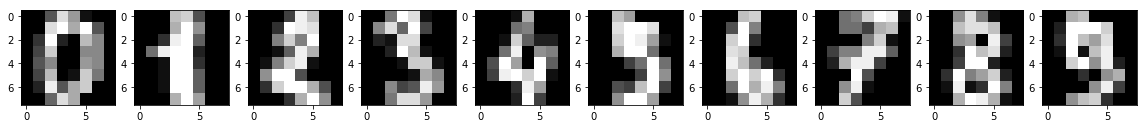

In [22]:
digits
type(digits) # sklearn.utils.Bunch
digits.data.shape  # (1797, 64)

############ target   여기서는 0~9까지의 숫자들인듯
digits.target.shape # (1797,)
digits.target # array([0, 1, 2, ..., 8, 9, 8])
digits.target[0:5] # array([0, 1, 2, 3, 4])

####### enumerate? 
# enumerate 함수
# 리스트가 있는 경우 순서와 리스트의 값을 전달하는 기능
# enumerate는 “열거하다”라는 뜻이다.
# 이 함수는 순서가 있는 자료형(리스트, 튜플, 문자열)을 입력으로 받아
# 인덱스 값을 포함하는 enumerate 객체를 리턴한다.

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])): 
    print('index : {}  label : {}  image : {}'.format(index,label, image))
    print()
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)

In [31]:
digits.data[0].shape # (64,)
digits.data[0].reshape(8,8)  # -> 0
digits.data[1].reshape(8,8)  # -> 1

digits.target[0], digits.target[1], digits.target[2], digits.target[3]   #  (0, 1, 2, 3)

(0, 1, 2, 3)

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size = 0.25, random_state=0)

In [33]:
logRegTest = LogisticRegression()
logRegTest.fit(xtrain, ytrain)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
logRegTest.predict(xtest[0].reshape(1,-1))   # array([2])

array([2])

In [35]:
logRegTest.predict(xtest[0:10])   # array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [39]:
ytest[0:10]      # array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

array([2, 8, 9, 7, 2, 1, 4, 9, 3, 2])

In [40]:
# 정확도를 나타냄
logRegTest.score(xtest, ytest)     # 0.9533333333333334

0.9533333333333334